In [1]:
#DATA COLLECTION 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


In [3]:
df= pd.read_csv(r"C:\Users\Vinay\Documents\PGAGI\Dataset - complex_account_billing_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Account ID     110 non-null    int64  
 1   Customer Name  110 non-null    object 
 2   Billing Date   110 non-null    object 
 3   Amount         110 non-null    float64
 4   Status         110 non-null    object 
 5   Description    110 non-null    object 
 6   Department     110 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.1+ KB


In [5]:
df.head()

,Account ID,Customer Name,Billing Date,Amount,Status,Description,Department
0,1001,David Wilson,01-01-2023,193.987558,Pending,Consultation,Pediatrics
1,1002,Alice Johnson,02-01-2023,370.656021,Pending,Purchase,Orthopedics
2,1003,Sophia Garcia,03-01-2023,233.019486,Pending,Lab Test,Pharmacy
3,1004,Olivia Davis,04-01-2023,296.120725,Paid,Follow-up,Pharmacy
4,1005,David Wilson,05-01-2023,294.654764,Paid,Therapy,ENT


In [6]:
#DATA CLEANING AND STANDARDIZATION 

In [7]:
df['Billing Date'] = pd.to_datetime(df['Billing Date'],dayfirst=True)

df['Customer Name'] = df['Customer Name'].str.title()
df['Status'] = df['Status'].str.upper()

In [8]:
print(df.duplicated(subset=['Account ID']).sum)

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
105     True
106     True
107     True
108     True
109     True
Length: 110, dtype: bool>


In [9]:
df.drop_duplicates()

,Account ID,Customer Name,Billing Date,Amount,Status,Description,Department
0,1001,David Wilson,2023-01-01,193.987558,PENDING,Consultation,Pediatrics
1,1002,Alice Johnson,2023-01-02,370.656021,PENDING,Purchase,Orthopedics
2,1003,Sophia Garcia,2023-01-03,233.019486,PENDING,Lab Test,Pharmacy
3,1004,Olivia Davis,2023-01-04,296.120725,PAID,Follow-up,Pharmacy
4,1005,David Wilson,2023-01-05,294.654764,PAID,Therapy,ENT
...,...,...,...,...,...,...,...
105,1026,Chris Lee,2023-01-26,182.072114,UNPAID,Follow-up,Orthopedics
106,1027,Olivia Davis,2023-01-27,87.943419,PAID,Follow-up,Radiology
107,1028,Mason Rodriguez,2023-01-28,1511.137290,PENDING,Medication,Oncology
108,1029,John Doe,2023-01-29,72.217921,PAID,Service Fee,Unknown


In [10]:
print(df.isnull().sum())


Account ID       0
Customer Name    0
Billing Date     0
Amount           0
Status           0
Description      0
Department       0
dtype: int64


In [11]:
df.shape

(110, 7)

In [12]:
#DATA VALIDATION 

In [13]:
df['Status'].unique()

array(['PENDING', 'PAID', 'UNPAID', 'UNKNOWN'], dtype=object)

In [14]:
negative_amounts = df[df['Amount'] < 0]
print(f"\n Number of negative amounts: {len(negative_amounts)}")


 Number of negative amounts: 0


In [15]:
duplicates = df[df.duplicated(['Account ID', 'Billing Date', 'Amount'])]
print(f'Duplicate Transactions: {len(duplicates)}')

Duplicate Transactions: 0


In [16]:
#BILLING ANALYSIS 

In [17]:
avg_payment = df['Amount'].mean()
print(f'Average Payment Amount: {avg_payment}')

Average Payment Amount: 479.3090181019999


In [18]:
discrepancies = df[df['Amount'] < 0]
print(f'Payment Discrepancies: {len(discrepancies)}') 

Payment Discrepancies: 0


In [19]:
late_payments = df[df['Status'] == 'PENDING']
print(f'Late Payments: {len(late_payments)}')

total_late_amount = late_payments['Amount'].sum()
print(f'Total Pending Amount: ${total_late_amount:.2f}') 


Late Payments: 33
Total Pending Amount: $29588.75


In [20]:
unpaid_payments = df[df['Status'] == 'UNPAID']
print(f'Unpaid Payments: {len(unpaid_payments)}')

total_unpaid_amount = unpaid_payments['Amount'].sum()
print(f'Total Unpaid Amount: ${total_unpaid_amount:.2f}')


Unpaid Payments: 34
Total Unpaid Amount: $10113.35


In [21]:
print(df['Department'].unique())

['Pediatrics' 'Orthopedics' 'Pharmacy' 'ENT' 'General Practice'
 'Neurology' 'Cardiology' 'Dermatology' 'Unknown' 'Radiology' 'Oncology']


In [22]:
#BILLING ANALYSIS OF PHARMACY DEPARTMENT

In [23]:
pharmacy_df = df[df['Department'] == 'Pharmacy']

print("\nPharmacy department statistics:")
print(pharmacy_df['Amount'].describe())




Pharmacy department statistics:
count     13.000000
mean     288.691679
std      135.060517
min       91.117443
25%      172.551862
50%      296.120725
75%      392.783085
max      474.625286
Name: Amount, dtype: float64


In [24]:
status_counts = pharmacy_df['Status'].value_counts()
print("\nBilling status distribution:")
print(status_counts)




Billing status distribution:
Status
PAID       9
PENDING    4
Name: count, dtype: int64


In [25]:
avg_payment_by_status = pharmacy_df.groupby('Status')['Amount'].mean()
print("\nAverage payment amount by status:")
print(avg_payment_by_status)




Average payment amount by status:
Status
PAID       299.258752
PENDING    264.915765
Name: Amount, dtype: float64


In [26]:
high_cost_threshold = pharmacy_df['Amount'].quantile(0.95)
high_cost_transactions = pharmacy_df[pharmacy_df['Amount'] > high_cost_threshold]
print(f"\nNumber of high-cost transactions: {len(high_cost_transactions)}")




Number of high-cost transactions: 1


In [27]:
pharmacy_df = pharmacy_df.copy()
pharmacy_df.loc[:, 'Billing Date'] = pd.to_datetime(pharmacy_df['Billing Date'])
pharmacy_df.loc[:, 'Billing Cycle'] = pharmacy_df['Billing Date'].dt.to_period('M')
transactions_per_cycle = pharmacy_df.groupby('Billing Cycle').size()
print("\nTransactions per billing cycle:")
print(transactions_per_cycle)


Transactions per billing cycle:
Billing Cycle
2023-01    4
2023-02    4
2023-03    3
2023-04    2
Freq: M, dtype: int64


In [28]:
#REPORT GENARTION 

In [29]:
def generate_report(df, department):
    report = f"Billing Audit Report for {department} Department\n"
    report += "=" * 50 + "\n\n"
    
    dept_df = df[df['Department'] == department]
    
    report += f"1. Overview\n"
    report += f"   Total transactions: {len(dept_df)}\n"
    report += f"   Total billed amount: ${dept_df['Amount'].sum():.2f}\n"
    report += f"   Average transaction amount: ${dept_df['Amount'].mean():.2f}\n\n"
    
    report += f"2. Billing Status Distribution\n"
    for status, count in dept_df['Status'].value_counts().items():
        report += f"   {status}: {count} ({count/len(dept_df)*100:.1f}%)\n"
    report += "\n"
    
    report += f"3. High-Cost Transactions\n"
    high_cost_threshold = dept_df['Amount'].quantile(0.95)
    high_cost_transactions = dept_df[dept_df['Amount'] > high_cost_threshold]
    report += f"   Number of high-cost transactions: {len(high_cost_transactions)}\n"
    report += f"   Threshold for high-cost: ${high_cost_threshold:.2f}\n\n"
    
    report += f"4. Billing Cycle Analysis\n"
    dept_df = dept_df.copy()
    dept_df.loc[:, 'Billing Date'] = pd.to_datetime(dept_df['Billing Date'])
    dept_df.loc[:, 'Billing Cycle'] = dept_df['Billing Date'].dt.to_period('M')
    transactions_per_cycle = dept_df.groupby('Billing Cycle').size()
    report += f"   Average transactions per cycle: {transactions_per_cycle.mean():.1f}\n"
    report += f"   Most active cycle: {transactions_per_cycle.idxmax()} ({transactions_per_cycle.max()} transactions)\n\n"
    
    report += f"5. Key Findings\n"
    
    

    top_customers = dept_df.groupby('Customer Name')['Amount'].sum().nlargest(3)
    
  
    transaction_types = dept_df['Description'].value_counts()
    
    report += "   Key Findings:\n"
    report += f"   a. The top 3 customers by total billing amount are: {', '.join(top_customers.index)}.\n"
    report += f"   b. The most common transaction type is '{transaction_types.index[0]}' with {transaction_types.iloc[0]} occurrences.\n"
    report += f"   c. There are {len(high_cost_transactions)} high-cost transactions (above ${high_cost_threshold:.2f}).\n"
    
    
    return report


pharmacy_report = generate_report(df, 'Pharmacy')
print(pharmacy_report)

Billing Audit Report for Pharmacy Department

1. Overview
   Total transactions: 13
   Total billed amount: $3752.99
   Average transaction amount: $288.69

2. Billing Status Distribution
   PAID: 9 (69.2%)
   PENDING: 4 (30.8%)

3. High-Cost Transactions
   Number of high-cost transactions: 1
   Threshold for high-cost: $470.53

4. Billing Cycle Analysis
   Average transactions per cycle: 3.2
   Most active cycle: 2023-01 (4 transactions)

5. Key Findings
   Key Findings:
   a. The top 3 customers by total billing amount are: Jane Smith, Mason Rodriguez, Emma Brown.
   b. The most common transaction type is 'Lab Test' with 4 occurrences.
   c. There are 1 high-cost transactions (above $470.53).



In [30]:
def generate_report(df, department):
    report = f"Billing Audit Report for {department} Department\n"
    report += "=" * 50 + "\n\n"
    
    dept_df = df[df['Department'] == department]
    
    report += f"1. Overview\n"
    report += f"   Total transactions: {len(dept_df)}\n"
    report += f"   Total billed amount: ${dept_df['Amount'].sum():.2f}\n"
    report += f"   Average transaction amount: ${dept_df['Amount'].mean():.2f}\n\n"
    
    report += f"2. Billing Status Distribution\n"
    for status, count in dept_df['Status'].value_counts().items():
        report += f"   {status}: {count} ({count/len(dept_df)*100:.1f}%)\n"
    report += "\n"
    
    report += f"3. High-Cost Transactions\n"
    high_cost_threshold = dept_df['Amount'].quantile(0.95)
    high_cost_transactions = dept_df[dept_df['Amount'] > high_cost_threshold]
    report += f"   Number of high-cost transactions: {len(high_cost_transactions)}\n"
    report += f"   Threshold for high-cost: ${high_cost_threshold:.2f}\n\n"
    
    report += f"4. Billing Cycle Analysis\n"
    dept_df = dept_df.copy()
    dept_df.loc[:, 'Billing Date'] = pd.to_datetime(dept_df['Billing Date'])
    dept_df.loc[:, 'Billing Cycle'] = dept_df['Billing Date'].dt.to_period('M')
    transactions_per_cycle = dept_df.groupby('Billing Cycle').size()
    report += f"   Average transactions per cycle: {transactions_per_cycle.mean():.1f}\n"
    report += f"   Most active cycle: {transactions_per_cycle.idxmax()} ({transactions_per_cycle.max()} transactions)\n\n"
    
    report += f"5. Key Findings\n"
    
    

    top_customers = dept_df.groupby('Customer Name')['Amount'].sum().nlargest(3)
    
  
    transaction_types = dept_df['Description'].value_counts()
    
    report += "   Key Findings:\n"
    report += f"   a. The top 3 customers by total billing amount are: {', '.join(top_customers.index)}.\n"
    report += f"   b. The most common transaction type is '{transaction_types.index[0]}' with {transaction_types.iloc[0]} occurrences.\n"
    report += f"   c. There are {len(high_cost_transactions)} high-cost transactions (above ${high_cost_threshold:.2f}).\n"
    
    
    return report


pharmacy_report = generate_report(df, 'Dermatology')
print(pharmacy_report)

Billing Audit Report for Dermatology Department

1. Overview
   Total transactions: 10
   Total billed amount: $2957.75
   Average transaction amount: $295.78

2. Billing Status Distribution
   UNPAID: 5 (50.0%)
   PAID: 3 (30.0%)
   PENDING: 1 (10.0%)
   UNKNOWN: 1 (10.0%)

3. High-Cost Transactions
   Number of high-cost transactions: 1
   Threshold for high-cost: $817.91

4. Billing Cycle Analysis
   Average transactions per cycle: 3.3
   Most active cycle: 2023-01 (5 transactions)

5. Key Findings
   Key Findings:
   a. The top 3 customers by total billing amount are: Emma Brown, Liam Martinez, Olivia Davis.
   b. The most common transaction type is 'Consultation' with 4 occurrences.
   c. There are 1 high-cost transactions (above $817.91).



C:\Users\Vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Visualization saved as pharmacy_billing_report.png


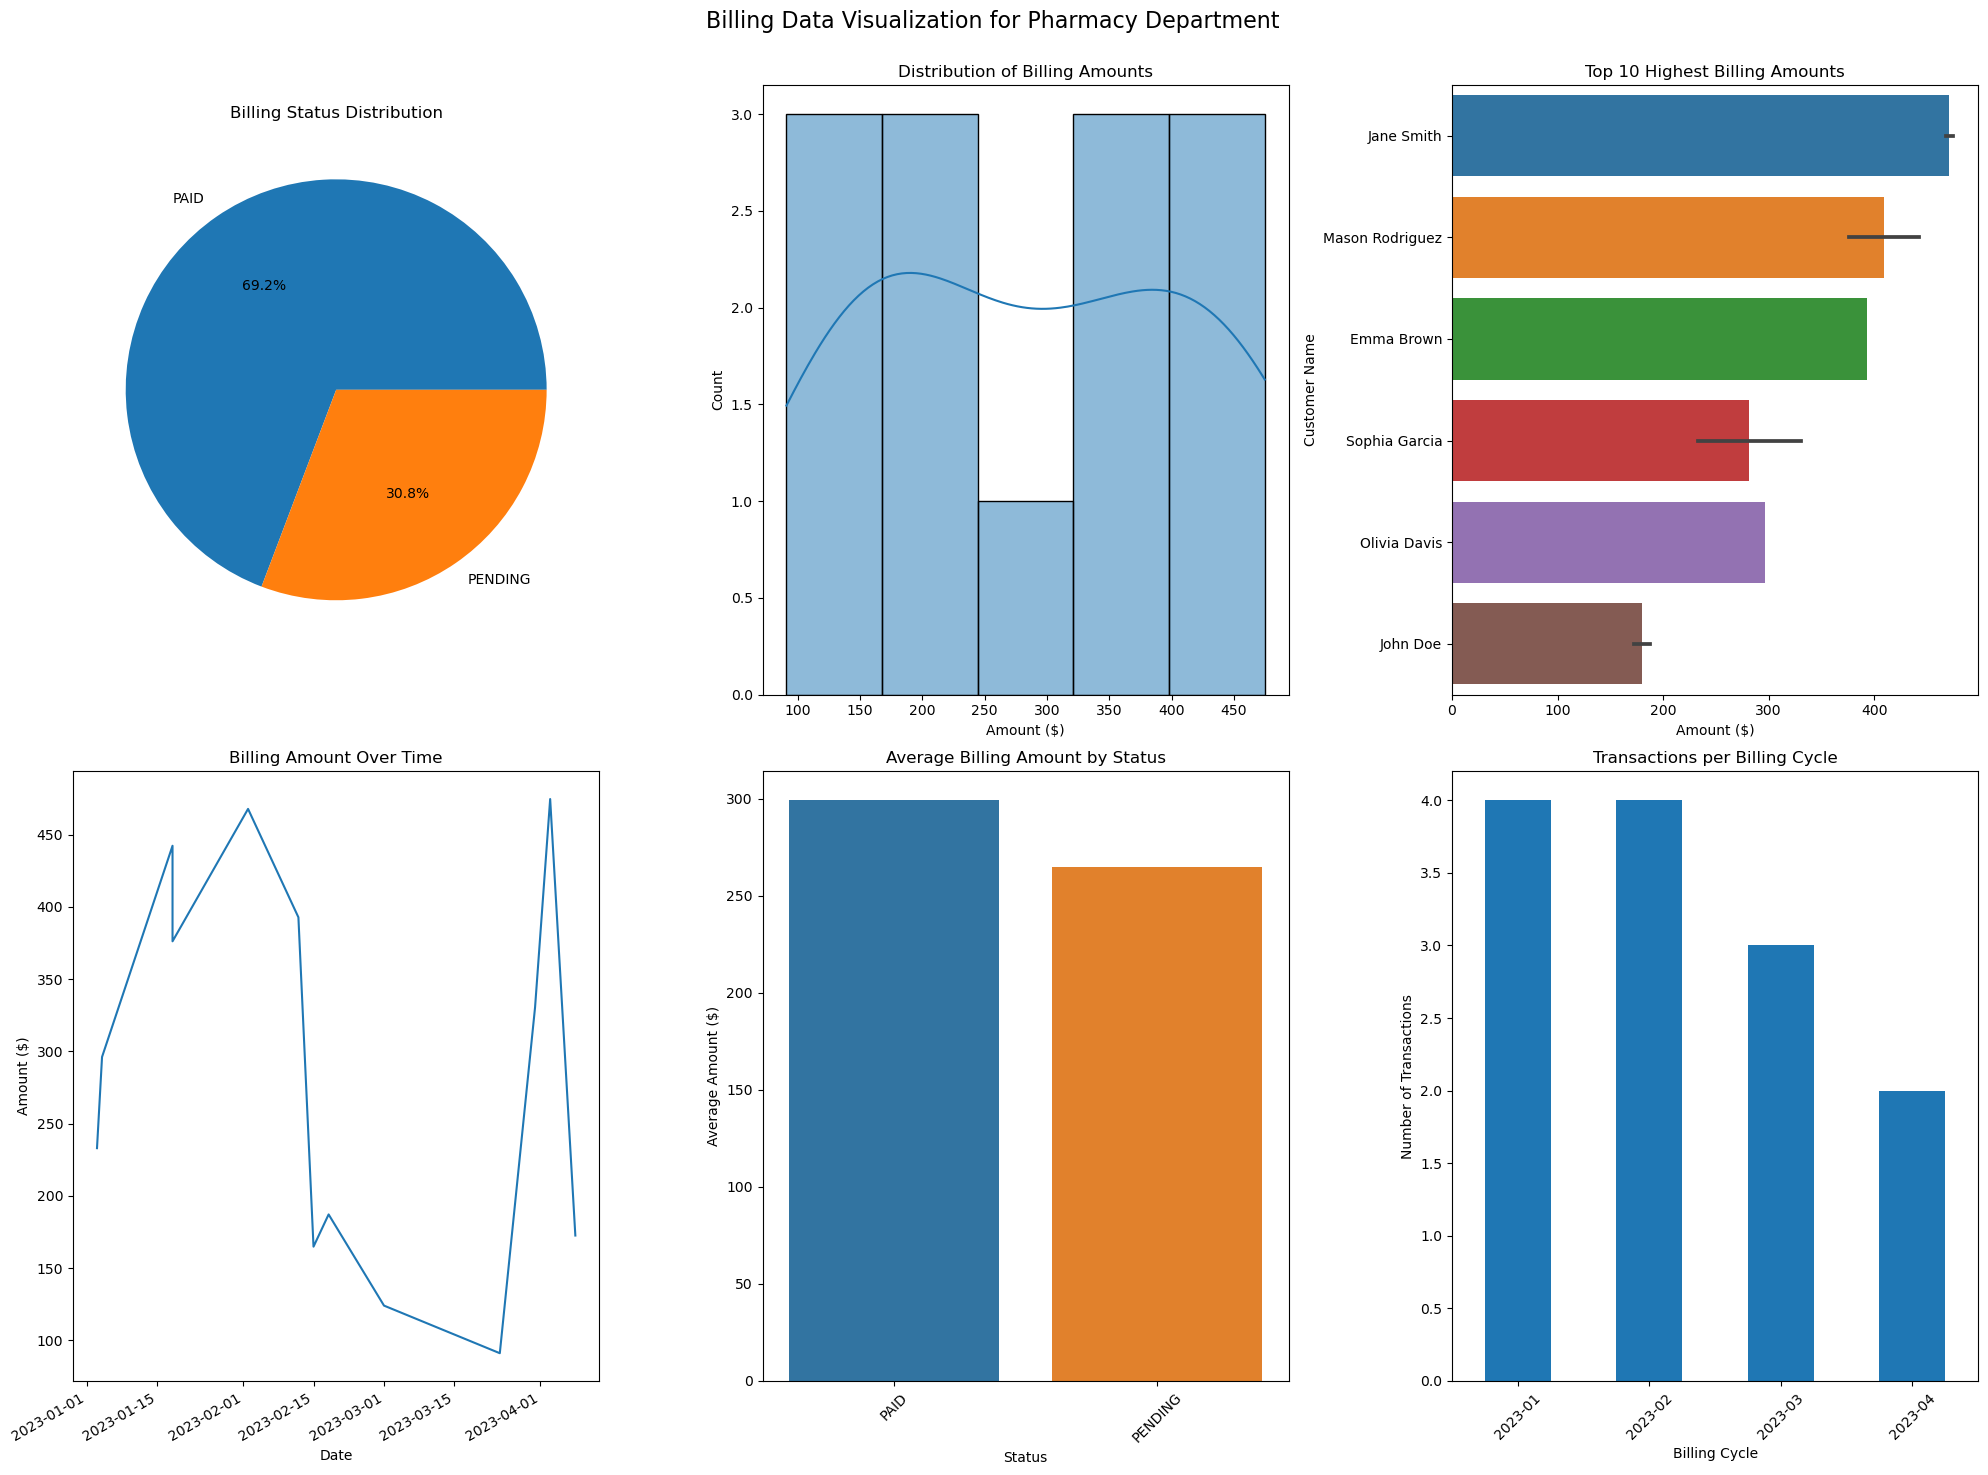

In [31]:

pharmacy_df = df[df['Department'] == 'Pharmacy']


def create_visualizations(dept_df, department):
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f'Billing Data Visualization for {department} Department', fontsize=16)


    ax1 = fig.add_subplot(231)
    status_counts = dept_df['Status'].value_counts()
    status_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax1)
    ax1.set_title('Billing Status Distribution')
    ax1.set_ylabel('')

    ax2 = fig.add_subplot(232)
    sns.histplot(dept_df['Amount'], kde=True, ax=ax2)
    ax2.set_title('Distribution of Billing Amounts')
    ax2.set_xlabel('Amount ($)')

    ax3 = fig.add_subplot(233)
    top_10 = dept_df.nlargest(10, 'Amount')
    sns.barplot(x='Amount', y='Customer Name', data=top_10, ax=ax3)
    ax3.set_title('Top 10 Highest Billing Amounts')
    ax3.set_xlabel('Amount ($)')

    ax4 = fig.add_subplot(234)
    dept_df.set_index('Billing Date')['Amount'].plot(ax=ax4)
    ax4.set_title('Billing Amount Over Time')
    ax4.set_xlabel('Date')
    ax4.set_ylabel('Amount ($)')

    ax5 = fig.add_subplot(235)
    avg_by_status = dept_df.groupby('Status')['Amount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_by_status.index, y=avg_by_status.values, ax=ax5)
    ax5.set_title('Average Billing Amount by Status')
    ax5.set_xlabel('Status')
    ax5.set_ylabel('Average Amount ($)')
    ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45)

    ax6 = fig.add_subplot(236)
    dept_df = dept_df.copy()
    dept_df.loc[:, 'Billing Cycle'] = dept_df['Billing Date'].dt.to_period('M')
    transactions_per_cycle = dept_df.groupby('Billing Cycle').size()
    transactions_per_cycle.plot(kind='bar', ax=ax6)
    ax6.set_title('Transactions per Billing Cycle')
    ax6.set_xlabel('Billing Cycle')
    ax6.set_ylabel('Number of Transactions')
    ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    
    plt.savefig(f'{department.lower()}_billing_report.png', dpi=300, bbox_inches='tight')
    print(f"Visualization saved as {department.lower()}_billing_report.png")

create_visualizations(pharmacy_df, 'Pharmacy')